## Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

In [2]:
import math
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt


Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее;
попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Выбрано рспределения Рэлея ( https://en.wikipedia.org/wiki/Rayleigh_distribution)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html  #scipy.stats.rayleigh

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё 
теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе,
не забудьте выставить у гистограммы значение параметра normed=True).


Text(0.5,0,'$x$')

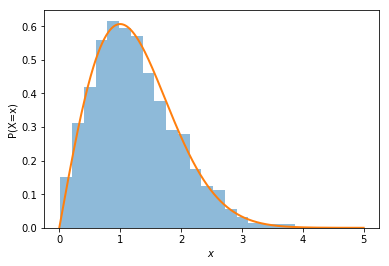

In [3]:
N= 1000
# Распределение Рэлея
rayl = st.rayleigh()
# Генерация N случайных чисел
xn=rayl.rvs(size=N)

  # Создание гистограммы
_, ax = plt.subplots()
ax.hist(xn, density=True, histtype='stepfilled',bins=20,alpha=0.5)
ax.legend(loc='best', frameon=False)

# График теоретической плотности распределения случайной величины по распределению Рэлея
x = np.linspace(0,5,N)
pdf = rayl.pdf(x)
ax.plot(x, pdf, linewidth=2)
ax.set_ylabel('P(X=x)')
ax.set_xlabel('$x$')

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.
Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте 
гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного
распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений,
которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и
дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность 
соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не
дисперсию, а стандартное отклонение).

In [34]:
#                                       Функции
def plot_norm (L, K, mu, sd):
     # График теоретической плотности распределения случайной величины Нормальное распределение
    norm_rv = st.norm(loc=mu,  scale=sd)
    x = np.linspace(0,3,K)
    pdf = norm_rv.pdf(x)
    bx.plot(x, pdf, linewidth=2)   
    
def plot_reyl (L, N,mean=[] ):  
    # Вычисление средних и гистограмма по Рэлею
    for i in range(N) :
        r = rayl.rvs(size=L)     
        mean[i] =np.mean(r)  
      # Создание гистограммы    
    bx.hist(Mmean, density=True, histtype='stepfilled',bins=20,alpha=0.5)   
    
def print_mu_sd(actual_mu, actual_sd, expected_mu, expected_sd):
    # Печать статистик
    print('Теоретическое среднее: {:.4f} приближенное:  {:.4f}'.format(expected_mu,actual_mu))
    print('Теоретическое стандартное откл.: {:.4f} приближенное: {:.4f}'.format(expected_sd,actual_sd))    



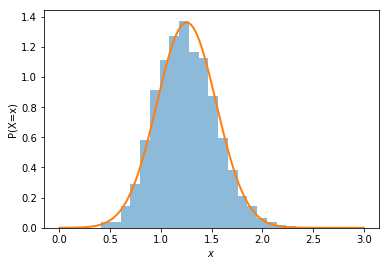

Теоретическое среднее: 1.2533 приближенное:  1.2471
Теоретическое стандартное откл.: 0.2930 приближенное: 0.2944


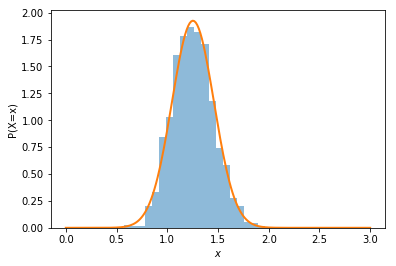

Теоретическое среднее: 1.2533 приближенное:  1.2518
Теоретическое стандартное откл.: 0.2072 приближенное: 0.2027


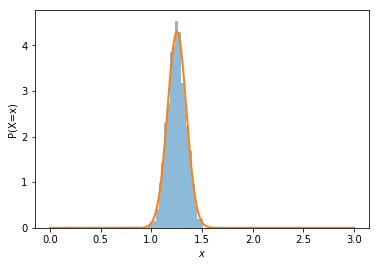

Теоретическое среднее: 1.2533 приближенное:  1.2514
Теоретическое стандартное откл.: 0.0927 приближенное: 0.0900


In [38]:
sigma=1.0 # Параметр
variance_teoretical = sigma**2*(4-math.pi)/2 # Теоретическая дисперсия
mu_teoretical =sigma* math.sqrt(math.pi/2.0) # Теоретическое средннее

N=1000 # количество выборок
Mmean=np.empty(N, dtype=float) # Массив средних значений по выборкам

# Перебор по размерам выборки
for n in [5,10,50]:
    _, bx = plt.subplots() 
    plot_reyl(n, N, Mmean)  # Гистограммы выборочных средних     
    actual_mu = np.mean(Mmean) # Вычисление статистик для выборочного среднего
    actual_sd =  np.std(Mmean)  
   
    expected_sd = math.sqrt(variance_teoretical)/math.sqrt(n)
    plot_norm(n, 200, mu_teoretical, expected_sd )   # График нормального распределения 
 
    
    bx.legend(loc='best', frameon=False)    
    bx.set_ylabel('P(X=x)')
    bx.set_xlabel('$x$')       
    plt.show()   
    print_mu_sd(actual_mu, actual_sd, mu_teoretical, expected_sd)


## Выводы
Как мы видим из графиков, распределение выборочных средних имеет вид, близкий к нормальному 
распределению что показывает, что центральная предельная теорема выполняется для распределения Рэлея 
даже с учетом явной ассимитричности.

Также из графиков и расчитанных значений среднего и среднеквадратичного отклонения можно наблюдать,
что чем больше n, тем точнее нормальная аппроксимация, тем лучше распределение описывается нормальным.
